In [1]:
import os
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df=pd.read_csv(r'C:\House_Price_Prediction\Data_Sets\Housing.csv')

In [3]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
x= df.drop("price",axis=1)
y=df["price"]
categorical_cols= ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]
numerical_cols=["area","bedrooms","bathrooms","stories","parking"]

In [6]:
x.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

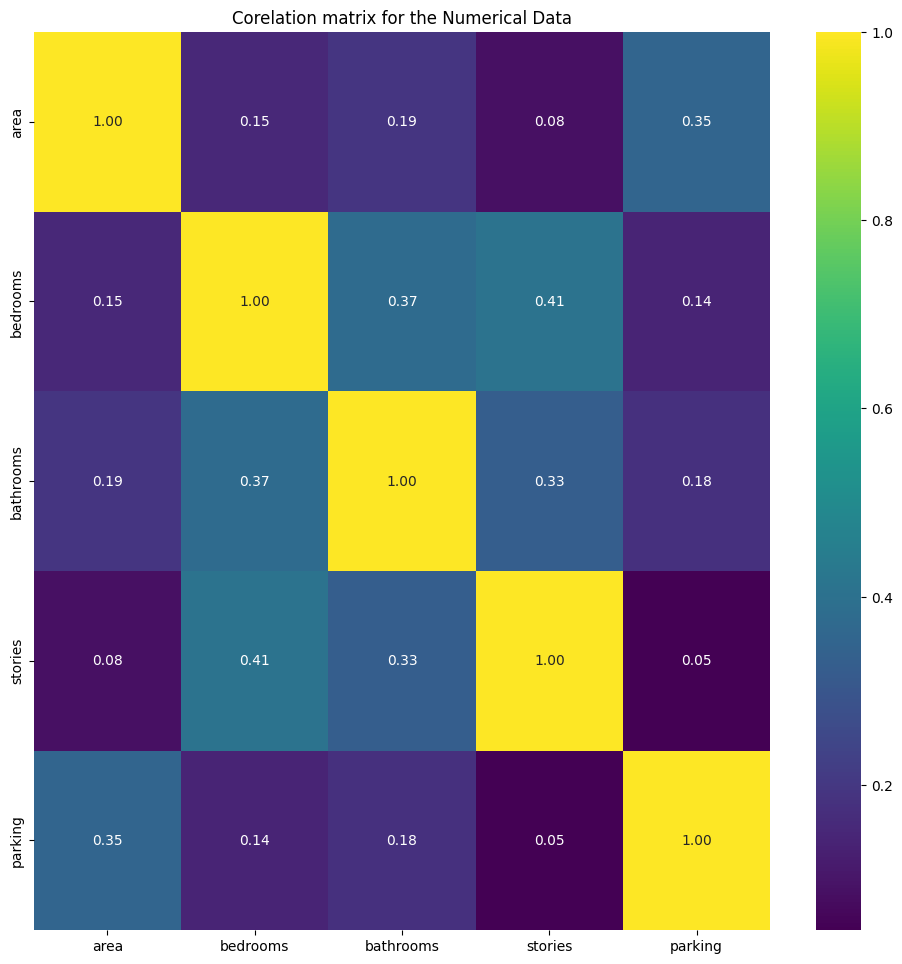

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap='viridis',fmt='.2f')
plt.title('Corelation matrix for the Numerical Data')
plt.tight_layout(pad=2.0)
plt.show()

In [8]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
df[categorical_columns].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


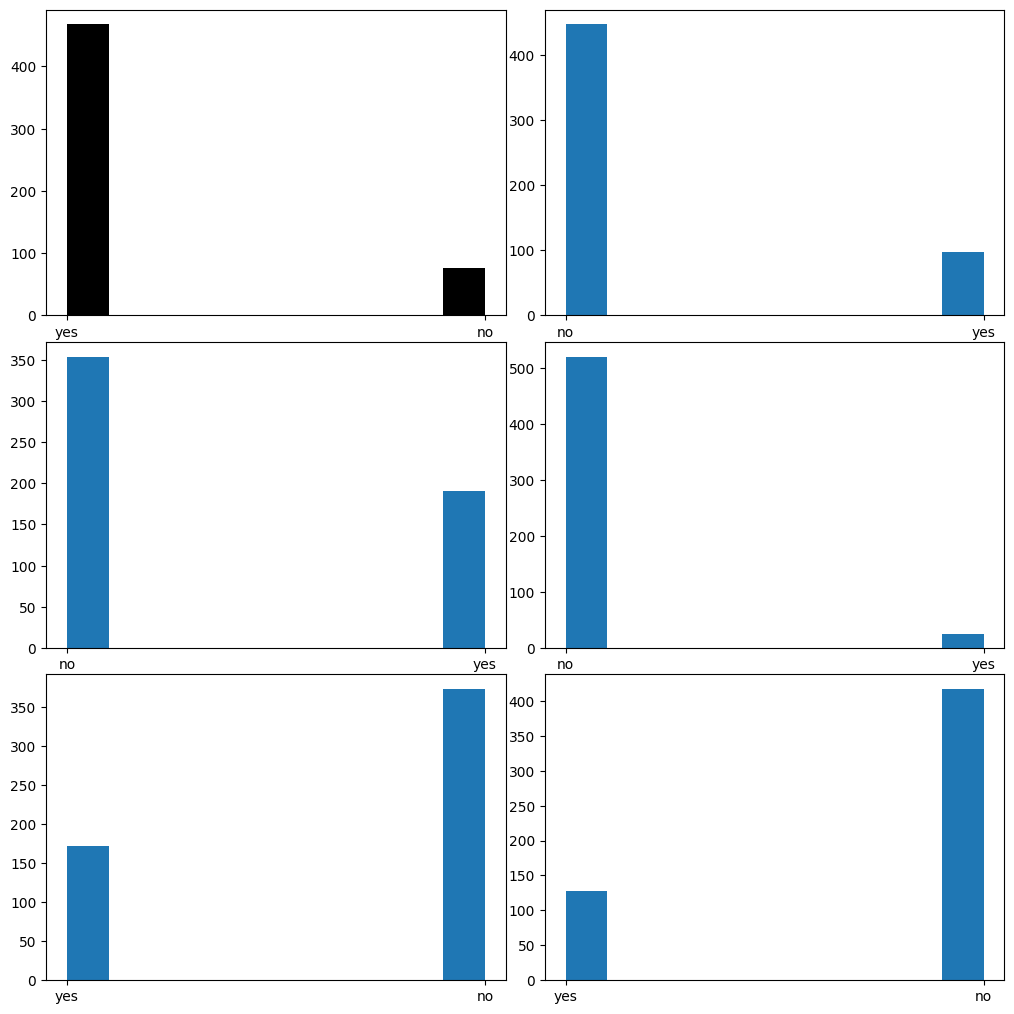

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.hist(df['mainroad'],color='black')
plt.subplot(3,2,2)
plt.hist(df['guestroom'])
plt.subplot(3,2,3)
plt.hist(df['basement'])
plt.subplot(3,2,4)
plt.hist(df['hotwaterheating'])
plt.subplot(3,2,5)
plt.hist(df['airconditioning'])
plt.subplot(3,2,6)
plt.hist(df['prefarea'])

plt.tight_layout(pad=0.2)
plt.show()

In [10]:
X = df.drop("price", axis=1)
y = df["price"]

categorical_cols = ["mainroad","guestroom","basement","hotwaterheating",
                    "airconditioning","prefarea","furnishingstatus"]
numerical_cols = ["area","bedrooms","bathrooms","stories","parking"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ]
)

models = {
    "Linear_Regression": LinearRegression(),
    "Decision_Tree": DecisionTreeRegressor(random_state=42),
    "Random_Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=3),
    "SVM": SVR(kernel="rbf")
}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

os.makedirs("ML_Model", exist_ok=True)

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("regressor", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(f"\n{name} Results:")
    print("  R² Score:", r2_score(y_test, y_pred))
    print("  MAE:", mean_absolute_error(y_test, y_pred))
    print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    
    # Save model
    joblib.dump(pipe, f"ML_Model/{name}_model.pkl")
    print(f"   Saved: ML_Model/{name}_model.pkl")

bins = pd.qcut(y, q=3, labels=["Low","Medium","High"])
y_class = bins

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

nb_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                          ("classifier", GaussianNB())])

nb_pipe.fit(X_train_c, y_train_c)
nb_pred = nb_pipe.predict(X_test_c)
nb_accuracy = (nb_pred == y_test_c).mean()

print(f"\nNaive Bayes Results:")
print("  Accuracy:", nb_accuracy)

# Save Naive Bayes model separately
joblib.dump(nb_pipe, "ML_Model/Naive_Bayes_model.pkl")
print("  Saved: ML_Model/Naive_Bayes_model.pkl")


Linear_Regression Results:
  R² Score: 0.6529242642153177
  MAE: 970043.4039201641
  RMSE: 1324506.96009144
   Saved: ML_Model/Linear_Regression_model.pkl

Decision_Tree Results:
  R² Score: 0.4771459275854347
  MAE: 1195266.0550458715
  RMSE: 1625669.904259373
   Saved: ML_Model/Decision_Tree_model.pkl

Random_Forest Results:
  R² Score: 0.6123660550314123
  MAE: 1021151.0811926605
  RMSE: 1399758.195088448
   Saved: ML_Model/Random_Forest_model.pkl

KNN Results:
  R² Score: 0.6059787362419773
  MAE: 1036377.4006116209
  RMSE: 1411243.4787180994
   Saved: ML_Model/KNN_model.pkl

SVM Results:
  R² Score: -0.10156329939722397
  MAE: 1763887.7499754021
  RMSE: 2359645.9644648107
   Saved: ML_Model/SVM_model.pkl

Naive Bayes Results:
  Accuracy: 0.7339449541284404
  Saved: ML_Model/Naive_Bayes_model.pkl
